* Rename this notebook as PRENOM_NOM_TP_ACTIVE_LEARNING.ipynb
* Delivery deadline is March the 28th

* Load the Digit dataset from [here](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html),
* to renormalize the data, divide by 255,
* create a train and test set: the size of the test set should be 250;
* evaluate the performance of a [Logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) on the data set that you just created. **Remark:** do not change model's hyperparameters.

In [97]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the digits dataset
digits = load_digits()

# Normalize the data
X = digits.data / 255.0
y = digits.target

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=250, random_state=42)

In [70]:
# Fit the model on the training data
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

clf.score(X_test,y_test)


0.896

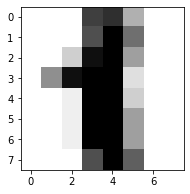

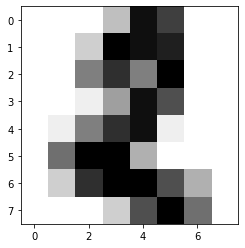

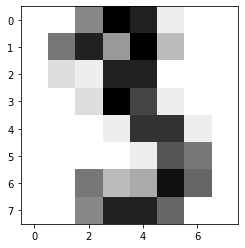

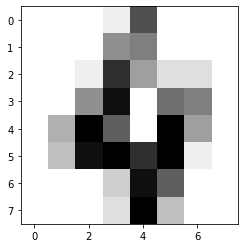

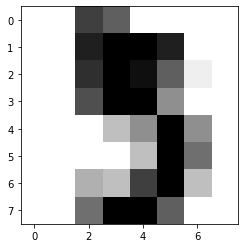

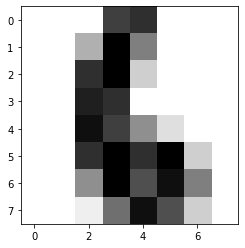

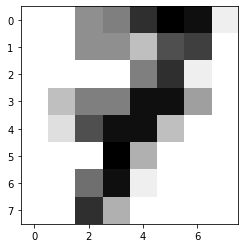

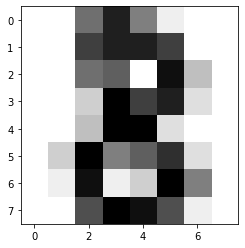

In [71]:
import matplotlib.pyplot as plt
# Display the last digit
plt.figure(1, figsize=(3, 3))
for i in range(1,9):
  plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation="nearest")
  plt.show()


Split the train set above to create a pool set and a train set; the size of the new train set should be 200. **Remark:** if you use Scikit Learn's function train_test_split, do not use the option 'stratify'.

In [98]:
# Split the train set into a pool set and a new train set
X_train_red, X_pool, y_train_red, y_pool = train_test_split(X_train, y_train, train_size=200, random_state=42)


In [76]:
#len(X_pool)
len(X_train_red)
#len(X_train_red)

200

The goal of this exercice is to implement the following learning algorithms:


1.   Random sampling,
2.   Active learning "least confidence" query strategy,
3.   Active learning "entropy" query strategy. 

and to plot, for each of them, the learning curve, having the accuracy and the iteration on the y and x axis respectively.

The general form of these algorithms, written in pseudo-code, is given here below:

**input:** x_train, x_test, y_train, y_test, x_pool, y_pool, max_number_iterations,

**output** score_list, a list containing model's accuracy for each iteration.
```
for i < max_number_iterations:
  initialize a Logistic regression classifier clf
  learn clf on x_train, y_train
  get clf score on x_test, y_test
  append score to score_list
  *query an instance and its label from x_pool, y_pool
  append the queried instance and its label to x_train, y_train
  delete the queried instance and its label from x_pool, y_pool

```
where the line starting with * should be replaced by 1. 2. and 3. The parameter max_number_iterations can be set equal to 400. You will find here below some hints to implement the three algorithms:

**Random sampling**: in this case you can just 
* sample a random row from x_pool,
* get the corresponding label from y_pool,

**Least confidence**:
* get the predicted probability distribution y_prob for each sample in x_pool (by using clf.predict_proba() )
* compute the maximum probability max_proba of the matrix y_prob along each row (by using numpy.amax())
* get the vector of least confidence by doing 1 - max_proba
* by using numpy.argmax(), select the index associated with the sample which has least confidence,
* get the corresponding label from y_pool.

**Entropy**:
* get the predicted probability distribution y_prob for each sample in x_pool (by using clf.predict_proba(),
* compute the entropy along each row by using the formula (-y_prob * np.log2(y_prob)).sum(axis=1),
* by using numpy.argmax(), select the index of the row with maximum entropy,
* get the corresponding label from y_pool.

For each of the three sampling strategies, make a plot displaying iteration (x axis) vs accuracy (y axis) and comment the results.

In [77]:
def random_sampling(x_train, x_test, y_train, y_test, x_pool, y_pool, max_number_iterations):
    score_list = []
    for i in range(max_number_iterations):
        clf = LogisticRegression()
        clf.fit(x_train, y_train)
        score = accuracy_score(y_test, clf.predict(x_test))
        score_list.append(score)
        
        query_index = np.random.choice(range(len(x_pool)))
        x_query = x_pool[query_index].reshape(1, -1)
        y_query = y_pool[query_index].reshape(1, -1)
        x_train = np.concatenate((x_train, x_query), axis=0)
        y_train = np.concatenate((y_train, y_query), axis=0)
        x_pool = np.delete(x_pool, query_index, axis=0)
        y_pool = np.delete(y_pool, query_index, axis=0)
        
    return score_list


In [66]:
def least_confidence(x_train, x_test, y_train, y_test, x_pool, y_pool, max_number_iterations):
    score_list = []
    for i in range(max_number_iterations):
        clf = LogisticRegression()
        clf.fit(x_train, y_train)
        score = accuracy_score(y_test, clf.predict(x_test))
        score_list.append(score)
        
        probas = clf.predict_proba(x_pool)
        confidences = 1 - np.max(probas, axis=1)
        query_index = np.argmin(confidences)
        x_query = x_pool[query_index].reshape(1, -1)
        y_query = y_pool[query_index].reshape(1, -1)
        x_train = np.concatenate((x_train, x_query), axis=0)
        y_train = np.concatenate((y_train, y_query), axis=0)
        x_pool = np.delete(x_pool, query_index, axis=0)
        y_pool = np.delete(y_pool, query_index, axis=0)
        
    return score_list


In [67]:
def entropy(x_train, x_test, y_train, y_test, x_pool, y_pool, max_number_iterations):
    score_list = []
    for i in range(max_number_iterations):
        clf = LogisticRegression()
        clf.fit(x_train, y_train)
        score = accuracy_score(y_test, clf.predict(x_test))
        score_list.append(score)
        
        probas = clf.predict_proba(x_pool)
        entropies = -np.sum(probas*np.log(probas), axis=1)
        query_index = np.argmax(entropies)
        x_query = x_pool[query_index].reshape(1, -1)
        y_query = y_pool[query_index].reshape(1, -1)
        x_train = np.concatenate((x_train, x_query), axis=0)
        y_train = np.concatenate((y_train, y_query), axis=0)
        x_pool = np.delete(x_pool, query_index, axis=0)
        y_pool = np.delete(y_pool, query_index, axis=0)
        
    return score_list


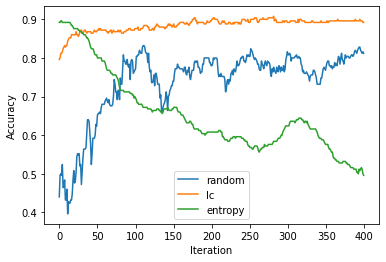

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# Define the maximum number of iterations
max_number_iterations = 400

X_pool_original = X_pool.copy()
y_pool_original = y_pool.copy()

# Run the three learning algorithms
for query_strategy in ["random", "lc", "entropy"]:

    # Initialize the score list
    score_list = []

    # Reset the pool set
    X_pool = X_pool_original.copy()
    y_pool = y_pool_original.copy()

    for i in range(max_number_iterations):
        
        # Initialize a logistic regression classifier
        clf = LogisticRegression()

        # Learn the classifier on the reduced training set
        clf.fit(X_train_red, y_train_red)

        # Get the classifier score on the test set
        score = clf.score(X_test, y_test)

        # Append the score to the score list
        score_list.append(score)

        # Query an instance and its label from the pool set
        if query_strategy == "random":
            query_idx = np.random.choice(range(len(X_pool)))
            queried_instance = X_pool[query_idx]
            queried_label = y_pool[query_idx]
        elif query_strategy == "lc":
            confidence = clf.predict_proba(X_pool)
            query_idx = np.argmin(np.max(confidence, axis=1))
            queried_instance = X_pool[query_idx]
            queried_label = y_pool[query_idx]
        elif query_strategy == "entropy":
            confidence = clf.predict_proba(X_pool)
            entropy = np.sum(-confidence*np.log(confidence), axis=1)
            query_idx = np.argmin(entropy)
            queried_instance = X_pool[query_idx]
            queried_label = y_pool[query_idx]

        # Append the queried instance and its label to the training set
        X_train_red = np.vstack([X_train_red, queried_instance])
        y_train_red = np.hstack([y_train_red, queried_label])

        # Delete the queried instance and its label from the pool set
        X_pool = np.delete(X_pool, query_idx, axis=0)
        y_pool = np.delete(y_pool, query_idx)

    # Plot the learning curve for the current query strategy
    plt.plot(range(max_number_iterations), score_list, label=query_strategy)

# Add labels and legend to the plot
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()

# Show the plot
plt.show()

Pour le model avec random sampling , on voit que l'accuracy augmente en fonction du nombre d'itération , pour le model avec LeastConfidence l'accuracy augmente puis reste constant au bout de quelques itérations . et pour le model avec entropy on voit meme que l'accuracy diminue . Notez bien que cette on peut observez d'autres variations comme par exemple un accuracy constant pour le model avec entropy . 